In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


In [ ]:
 from tensorflow.keras.datasets import mnist
 (train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(train_y[0])

5


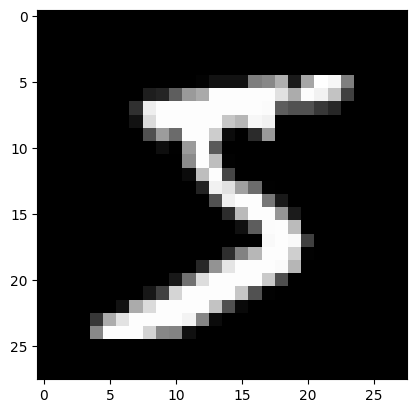

5


In [ ]:
plt.figure()
plt.imshow(train_x[0], cmap='gray')
plt.show()
print(train_y[0])


<function matplotlib.pyplot.show(close=None, block=None)>

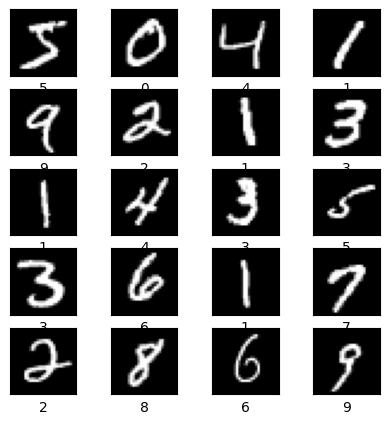

In [ ]:
plt.figure(figsize=(5,5))
for i in range (20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_x[i], cmap= 'gray')
  plt.xlabel(train_y[i])
plt.show

In [ ]:
train_x= train_x.reshape(-1, 28, 28, 1)
test_x= test_x.reshape(-1, 28, 28, 1)

In [ ]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_x= train_x.astype('float32')/255.0
test_x= test_x.astype('float32')/255.0

In [ ]:
train_x[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state=42)

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
train_x.shape[1:]

(28, 28, 1)

In [ ]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         800,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 824,326 (3.14 MB)

 Trainable params: 824,326 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
x= model.fit(train_x, train_y, epochs=10, batch_size= 30,  validation_data=(val_x, val_y))

Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.8901 - loss: 0.3480 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.9788 - loss: 0.0670 - val_accuracy: 0.9852 - val_loss: 0.0450
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.9845 - loss: 0.0481 - val_accuracy: 0.9915 - val_loss: 0.0298
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9881 - loss: 0.0375 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9908 - val_loss: 0.0326
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9918 - val_loss: 0.0320
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9924 -

In [ ]:
model.evaluate(test_x, test_y, batch_size= 30, verbose=2)

334/334 - 4s - 12ms/step - accuracy: 0.9928 - loss: 0.0243


[0.024336468428373337, 0.9927999973297119]

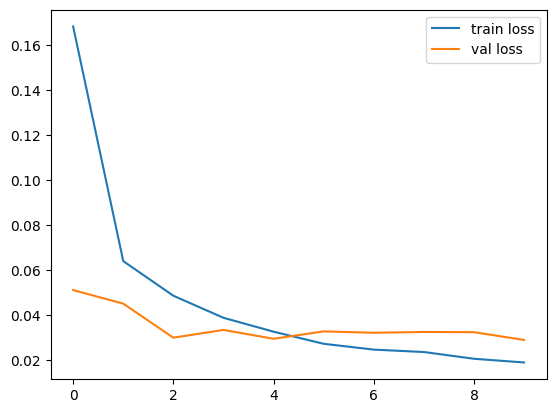

In [ ]:
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()

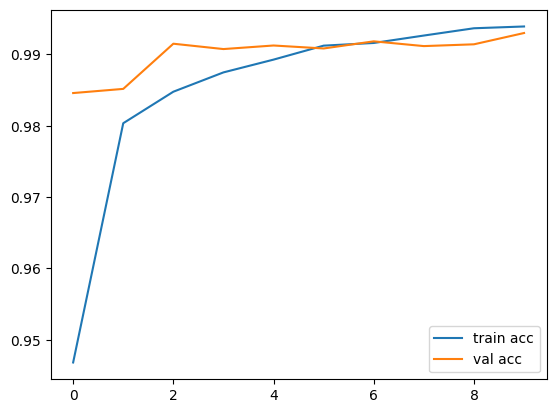

In [ ]:
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()